<a href="https://colab.research.google.com/github/nestormontano/PrDS_2024__TelcoCustomerChurn/blob/main/Gruopu_13_eda_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install skimpy

In [ ]:
!pip install typeguard

In [ ]:
!pip install typing_extensions

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import skimpy

ImportError: cannot import name 'Buffer' from 'typing_extensions' (/usr/local/lib/python3.10/dist-packages/typing_extensions.py)

## Premilinares
### Importacion

In [ ]:
data= pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head(2)

AttributeError: 'Index' object has no attribute '_format_flat'

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  

[2 rows x 21 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Corregir datos

In [ ]:
data.loc[ data['TotalCharges']== ' ' ]

AttributeError: 'Index' object has no attribute '_format_flat'

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [ ]:
data.loc[ data['TotalCharges']== ' ' ] = np.NaN

In [ ]:
data['TotalCharges']= pd.to_numeric(data['TotalCharges'])

In [ ]:
data.apply( lambda x: 'si' if x['SeniorCitizen'] == 0 else 'no', axis=1)

0       si
1       si
2       si
3       si
4       si
        ..
7038    si
7039    si
7040    si
7041    no
7042    si
Length: 7043, dtype: object

In [ ]:
data['SeniorCitizen']= data.apply( lambda x: 'si' if x['SeniorCitizen'] == 0 else 'no', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
import skimpy

In [ ]:
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7043   │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ tenure               │   11 │   0.16 │     32 │     25 │    1 │     9 │     29 │     55 │     72 │ ▇▃▃▃▃▅  │  │
│ │ MonthlyCharges       │   11 │   0.16 │     65 │     30 │   18 │    36 │     70 │     90 │    120 │ ▇▃▃▇▇▃  │  │
│ │ TotalCharges         │   11 │   0.16 │   2300 │   2300 │   19 │   400 │   1400 │   3800 │   8700 │ ▇▃▂▂▁▁  │  │
│ └──────────────────────┴──────┴────────┴────────┴────────┴──────┴───────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                       │     11 │      0.16 │                          1 │                  7032 │  │
│ │ gender                           │     11 │      0.16 │                          1 │                  7032 │  │
│ │ SeniorCitizen                    │      0 │         0 │                          1 │                  7043 │  │
│ │ Partner                          │     11 │      0.16 │                          1 │                  7032 │  │
│ │ Dependents                       │     11 │      0.16 │                          1 │                  7032 │  │
│ │ PhoneService                     │     11 │      0.16 │                          1 │                  7032 │  │
│ │ MultipleLines                    │     11 │      0.16 │                        1.2 │                  8392 │  │
│ │ InternetService                  │     11 │      0.16 │                        1.4 │                 10128 │  │
│ │ OnlineSecurity                   │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ OnlineBackup                     │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ DeviceProtection                 │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ TechSupport                      │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ StreamingTV                      │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ StreamingMovies                  │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ Contract                         │     11 │      0.1

## EDA Bivariado

### Room 12

### Room 13

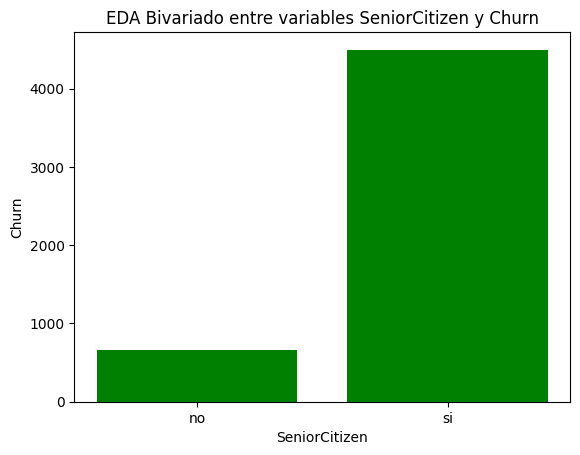

In [ ]:

import matplotlib.pyplot as plt

# Crear tabla cruzada entre seniorCitizzen y Churn
ct = pd.crosstab(data['SeniorCitizen'], data['Churn'])

plt.bar(ct.index, ct['Yes'], color='red')
plt.bar(ct.index, ct['No'], color='green')
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn')
plt.title('EDA Bivariado entre variables SeniorCitizen y Churn')
plt.show()


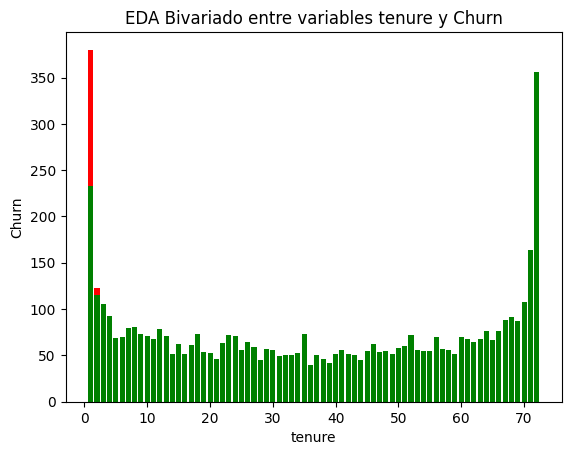

In [ ]:
ct = pd.crosstab(data['tenure'], data['Churn'])

# grafica de baarras

plt.bar(ct.index, ct['Yes'], color='red')
plt.bar(ct.index, ct['No'], color='green')
plt.xlabel('tenure')
plt.ylabel('Churn')
plt.title('EDA Bivariado entre variables tenure y Churn')
plt.show()

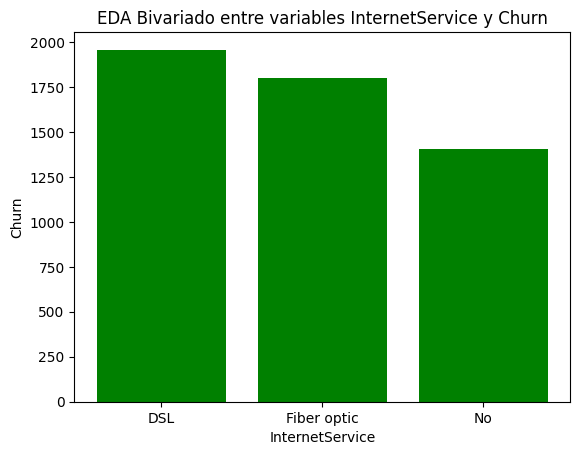

In [ ]:
ct = pd.crosstab(data['InternetService'], data['Churn'])

# grafica entre internetservice y churn
plt.bar(ct.index, ct['Yes'], color='red')
plt.bar(ct.index, ct['No'], color='green')
plt.xlabel('InternetService')
plt.ylabel('Churn')
plt.title('EDA Bivariado entre variables InternetService y Churn')
plt.show()

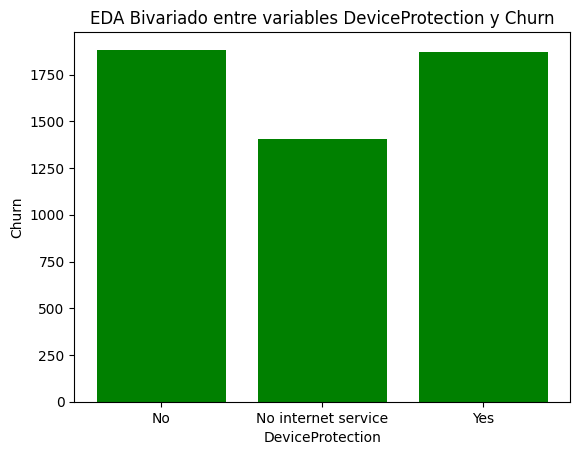

In [ ]:
ct = pd.crosstab(data['DeviceProtection'], data['Churn'])

# grafica entre internetservideviceprotection y churn
plt.bar(ct.index, ct['Yes'], color='red')
plt.bar(ct.index, ct['No'], color='green')
plt.xlabel('DeviceProtection')
plt.ylabel('Churn')
plt.title('EDA Bivariado entre variables DeviceProtection y Churn')
plt.show()

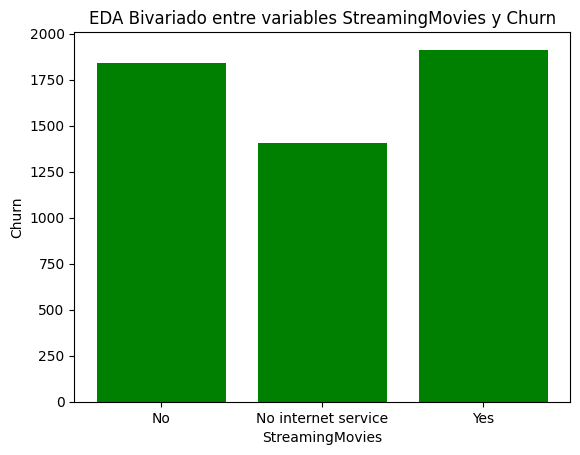

In [ ]:
ct = pd.crosstab(data['StreamingMovies'], data['Churn'])

# grafica entre internetserstreamingmovies y churn
plt.bar(ct.index, ct['Yes'], color='red')
plt.bar(ct.index, ct['No'], color='green')
plt.xlabel('StreamingMovies')
plt.ylabel('Churn')
plt.title('EDA Bivariado entre variables StreamingMovies y Churn')
plt.show()

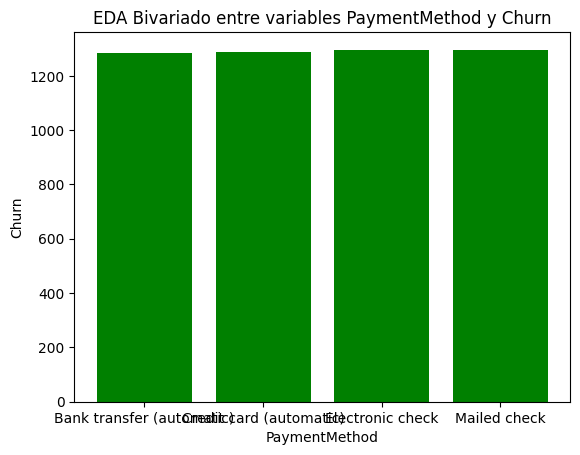

In [ ]:
ct = pd.crosstab(data['PaymentMethod'], data['Churn'])

# grafica entr pyament metod  y churn
plt.bar(ct.index, ct['Yes'], color='red', )
plt.bar(ct.index, ct['No'], color='green')
plt.xlabel('PaymentMethod')
plt.ylabel('Churn')
plt.title('EDA Bivariado entre variables PaymentMethod y Churn')
plt.show()

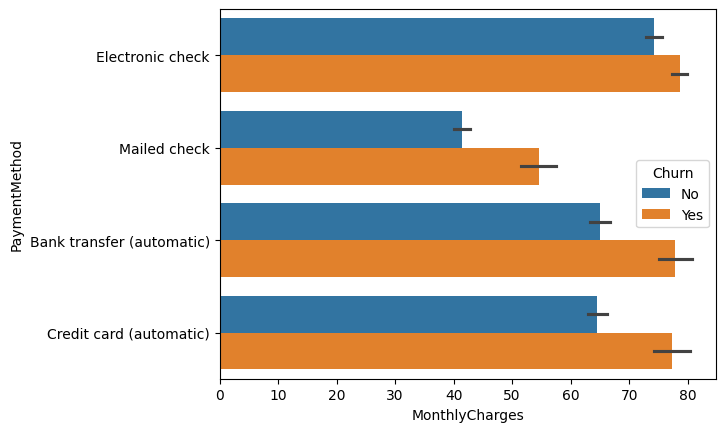

In [ ]:
import seaborn as sns

sns.barplot(x='MonthlyCharges', y='PaymentMethod', hue='Churn', data=data)
plt.show()


### Room 7